#### Employee Retention prediction

In [2]:
# Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [3]:
# Read csv file
df = pd.read_csv('./employee_retention.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
inputs_df = df.drop('left',axis='columns')
target_df = df['left']

In [5]:
inputs_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
# Converting Department Salary to labels
le_Department = LabelEncoder()
le_salary = LabelEncoder()

In [8]:
inputs_df['Department_n'] = le_Department.fit_transform(inputs_df['Department'])
inputs_df['salary_n'] = le_salary.fit_transform(inputs_df['salary'])

In [9]:
inputs_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Department_n,salary_n
0,0.38,0.53,2,157,3,0,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,0,sales,low,7,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,8,1
14995,0.37,0.48,2,160,3,0,0,support,low,8,1
14996,0.37,0.53,2,143,3,0,0,support,low,8,1
14997,0.11,0.96,6,280,4,0,0,support,low,8,1


In [10]:
code_le = pd.DataFrame()
code_le['Department'] = inputs_df['Department']
code_le['Department_n'] = inputs_df['Department_n']
code_le['salary'] = inputs_df['salary']
code_le['salary_n'] = inputs_df['salary_n']
code_le

,Department,Department_n,salary,salary_n
0,sales,7,low,1
1,sales,7,medium,2
2,sales,7,medium,2
3,sales,7,low,1
4,sales,7,low,1
...,...,...,...,...
14994,support,8,low,1
14995,support,8,low,1
14996,support,8,low,1
14997,support,8,low,1


In [11]:
# Storing codes
code_le.to_csv('codes.csv')

In [12]:
X_df = inputs_df.drop(['Department','salary'],axis='columns')
X_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_n,salary_n
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [13]:
# Train Test Divide
X_train, X_test, y_train, y_test= train_test_split(X_df,target_df,test_size=0.2)

In [14]:
len(X_train)
# train length = 11999 test length = 3000

11999

In [15]:
#Train the model
model = LogisticRegression(solver='lbfgs', max_iter=400) # default max iter is 100 
# in this case it gave lbfgs warning 
model.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [16]:
# Checking Accuracy
model.score(X_test,y_test)
# 78.1% 😑

0.7683333333333333

In [17]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<BarContainer object of 14999 artists>

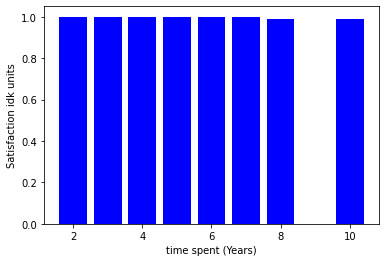

In [19]:
plt.xlabel('time spent (Years)')
plt.ylabel('Satisfaction idk units')
plt.bar(df['time_spend_company'],df['satisfaction_level'],color='blue')

In [28]:
left_df = df[df.left==0]
notleft_df = df[df.left==1]
left_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


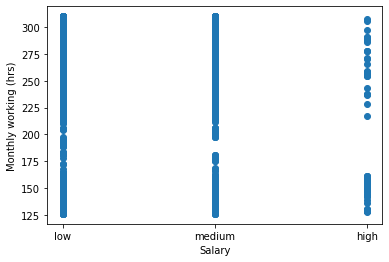

In [38]:
plt.xlabel('Salary')
plt.ylabel("Monthly working (hrs)")
plt.scatter(notleft_df['salary'],notleft_df['average_montly_hours'])